# Project 5
## CS 5483
## Due 5 Dec at 9 am

All the import statements

In [46]:
import networkx as nx
from networkx.algorithms import community
import numpy as np
from random import sample
import itertools
import matplotlib.pyplot as plt

### Question 1: Community Detection

1.a) Create random graphs using barabasi albert model with 1000 nodes and value of m ranging from 1 to 10

In [3]:
G1=nx.barabasi_albert_graph(n=200, m=1, seed=1)
G2=nx.barabasi_albert_graph(n=200, m=2, seed=1)
G3=nx.barabasi_albert_graph(n=200, m=3, seed=1)
G4=nx.barabasi_albert_graph(n=200, m=4, seed=1)
G5=nx.barabasi_albert_graph(n=200, m=5, seed=1)
G6=nx.barabasi_albert_graph(n=200, m=6, seed=1)
G7=nx.barabasi_albert_graph(n=200, m=7, seed=1)
G8=nx.barabasi_albert_graph(n=200, m=8, seed=1)
G9=nx.barabasi_albert_graph(n=200, m=9, seed=1)
G10=nx.barabasi_albert_graph(n=200, m=10, seed=1)


## 1.b) For each of the graphs created using barabasi model, find the number of communities using Grivan Newman algorithm

Reference: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html#networkx.algorithms.community.centrality.girvan_newman   
__If the algorithm ran n times, there will be n+1 commmunities.__

In [19]:
comp1=community.girvan_newman(G1, most_valuable_edge=None)

comp2=community.girvan_newman(G2, most_valuable_edge=None)

comp3=community.girvan_newman(G3, most_valuable_edge=None)

comp4=community.girvan_newman(G4, most_valuable_edge=None)

comp5=community.girvan_newman(G5, most_valuable_edge=None)

comp6=community.girvan_newman(G6, most_valuable_edge=None)

comp7=community.girvan_newman(G7, most_valuable_edge=None)


comp8=community.girvan_newman(G8, most_valuable_edge=None)

comp9=community.girvan_newman(G9, most_valuable_edge=None)


comp10=community.girvan_newman(G10, most_valuable_edge=None)
[len(next(comp1)),len(next(comp2)),len(next(comp3)),len(next(comp4)),len(next(comp5)),len(next(comp6)),len(next(comp7)),len(next(comp8))
,len(next(comp9)),len(next(comp10))]

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

1.c) For each graph calculate the highest modularity score for a maximum of 15 components using the communities created from 1.b)

`
 k = 2
comp = girvan_newman(G)
for communities in itertools.islice(comp, k):
    comms = tuple(sorted(c) for c in communities)
    modularity = community.modularity(G, comm)
`

use this a base code to calculate the maximum modularity up to 15 components. Also, fetch the store the number of components to which the graph exhibits maximum modularity.

In [45]:
Gall=[G1,G2,G3,G4,G5,G6,G7,G8,G9,G10]
m=list(range(10))
j=0
for G in Gall:

    modularity=list(range(15))
    k = 15
    comp = community.girvan_newman(G)
    i=0
    for communities in itertools.islice(comp, k):
        comms = tuple(sorted(c) for c in communities)
        modularity[i] = community.modularity(G, comms)
        i=i+1
    m[j]=modularity.index(max(modularity))
    j=j+1

In [47]:
print("the number of components to which the graph exhibits maximum modularity for G1 to G10 is:\n", m)

the number of components to which the graph exhibits maximum modularity for G1 to G10 is:
 [12, 12, 14, 14, 14, 14, 14, 13, 10, 6]


1.d) For each value of m, plot the number of communities on y-axis and the respective values of m on x-axis.

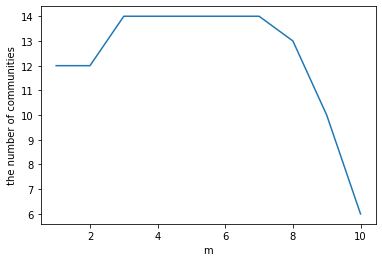

In [48]:
fig, ax = plt.subplots()
ax.plot(range(1,11), m)

ax.set(xlabel='m', ylabel=' the number of communities ')

plt.show()

## Question 2: Network Percolation

2.a) Download the following power grid network and store it in a graph H

http://networkrepository.com/power-US-Grid.php

Find the size of the largest connected component (Giant component) of the graph H

It is 4941.

In [51]:
H=nx.read_edgelist('power-US-Grid.mtx',comments="%")

SIZE=len(sorted(nx.connected_components(H), key=len, reverse=True)[0])
SIZE

4941

Phi is defined as a occupation probability

2.b) Construct 11 subgraphs for the power grid network using the occupation probabilty as a parameter.

Perform the operation for phi = 0, 0.1, 0.2, 0.3, ..., 0.9, 1.0

The subgraph fro phi=0 is an empty graph

In [84]:
phi=[float(i)/10 for i in list((range(0,11)))]

In [89]:
G=list(range(10))
j=0
for i in phi:
    if int(len(H.nodes)*i)>0:
        G[j]=nx.subgraph(H,list(H.nodes)[0:int(len(H.nodes)*i)])
        j=j+1

In [90]:
G

2.c) Find the connected components for all the subgraphs and also the size of the largest connected components for all the subgraphs.

Find the ratio of the size of the largest connected component of each subgraphs with the size of the largest connected component in H 

In [98]:
len_largest=list(range(10))
j=0
for Gi in G:
    len_largest[j]=len(sorted(nx.connected_components(Gi), key=len, reverse=True)[0])
    j=1+j
print("the ratio for phi=0,..1 is\n",[float(i)/SIZE for i in [0]+len_largest])

the ratio for phi=0,..1 is
 [0.0, 0.05160898603521554, 0.12001619105444242, 0.15320785266140458, 0.23679417122040072, 0.49483910139647846, 0.5954260271200162, 0.6790123456790124, 0.6998583282736288, 0.8010524185387573, 1.0]


2.d) Let S be the size of the fraction of the giant component, plot S on y-axis and phi on x-axis.

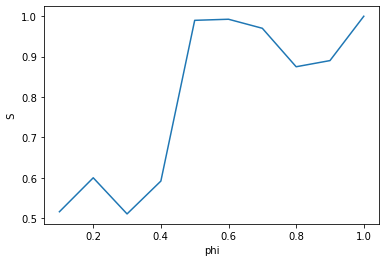

In [101]:
S=list(range(10))
j=0
for Gi in G:
    S[j]=float(len(sorted(nx.connected_components(Gi), key=len, reverse=True)[0]))/len(Gi)
    j=1+j

fig, ax = plt.subplots()
ax.plot(phi[1:11], S)

ax.set(xlabel='phi', ylabel=' S ')

plt.show()  
    

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]